In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

import seaborn as sb
from patsy import dmatrices
from IPython.display import display
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.1. Realizar el Laboratorio de la sección 4.6 del libro “An Introduction to Statistical Learning with
Applications in R” de Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani, realice los
ejercicios para el conjunto de datos de mercado (Smarket) sección 4.6.1. Muestre imágenes de la
respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio (colocar las
imágenes en su reporte).


['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']
(1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


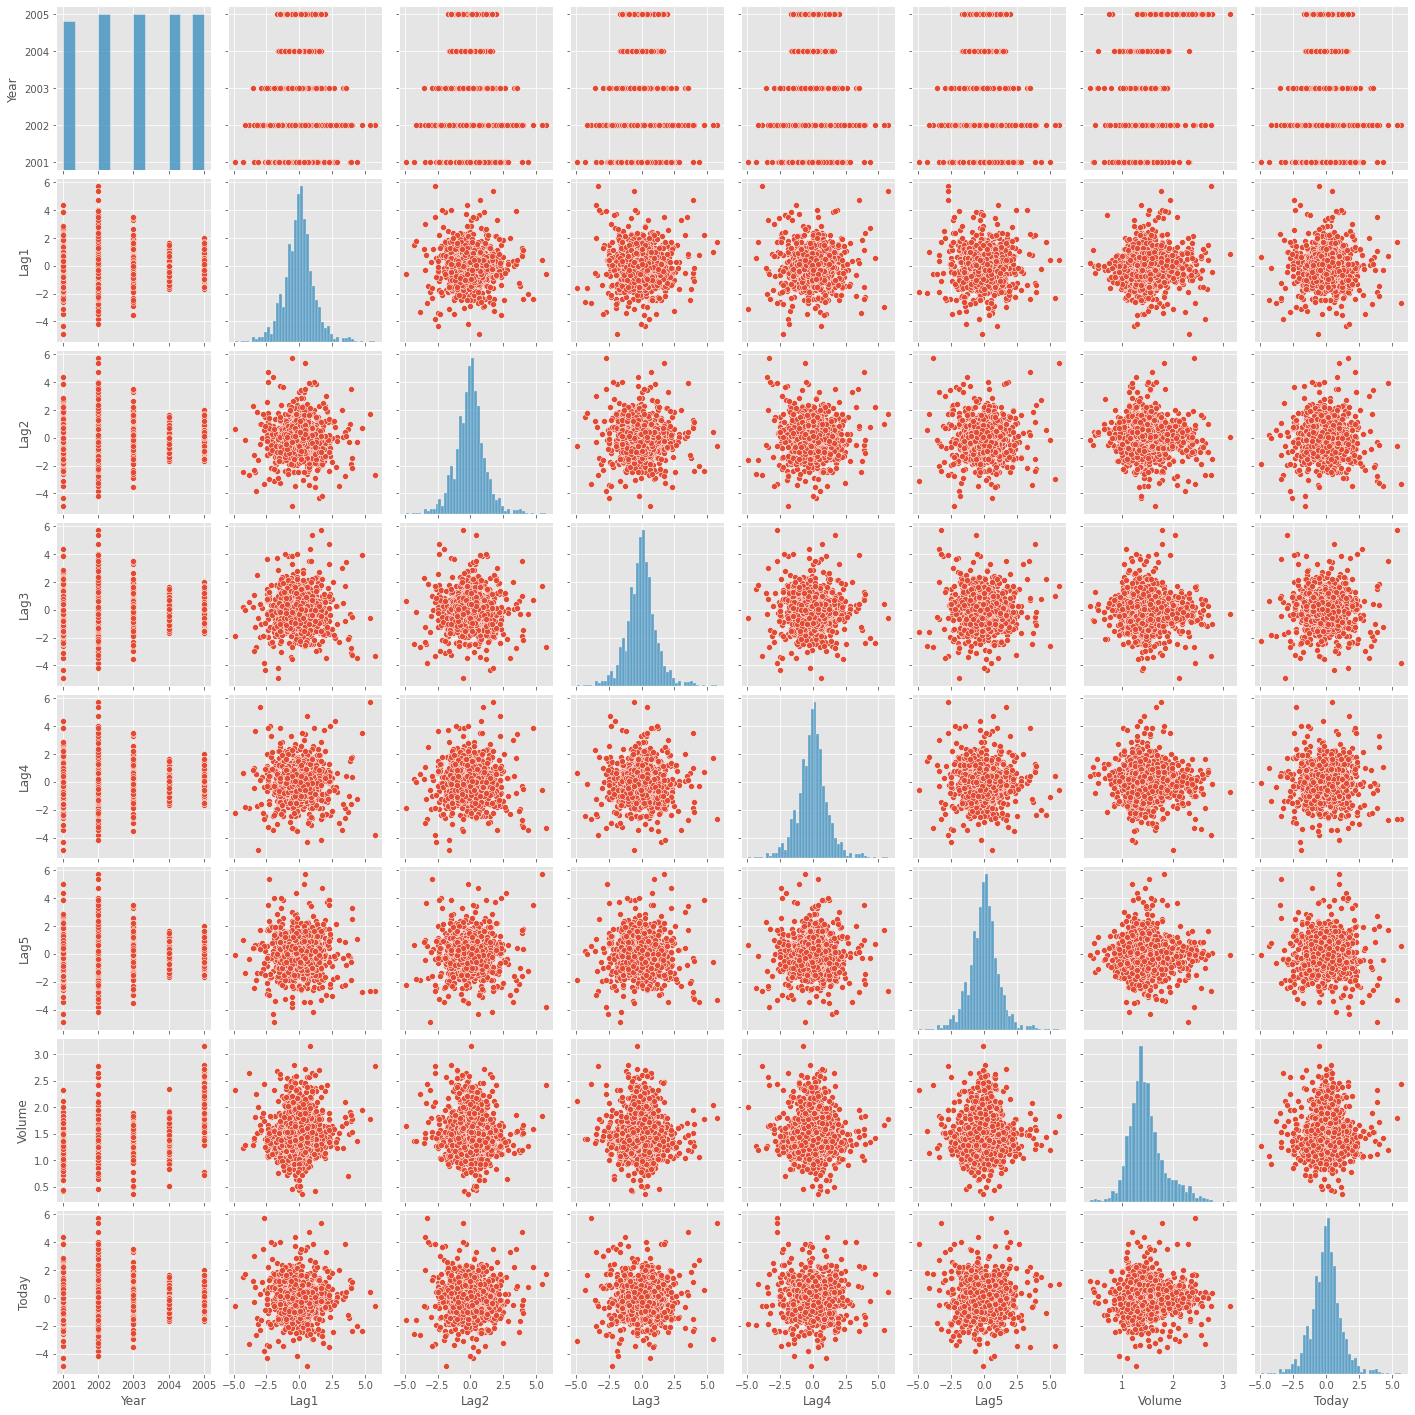

In [2]:
smarket = pd.read_csv('./smarket.csv')
smarket = smarket.iloc[:,1::]

print(list(smarket))
print(smarket.shape)
display(smarket.describe())
print(sb.pairplot(smarket))

In [3]:
display(smarket.corr())

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


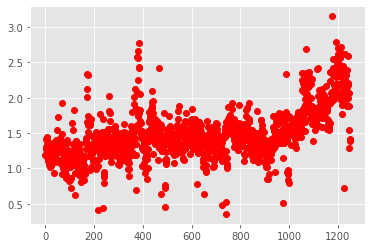

In [4]:
plt.plot(smarket['Volume'],'ro')
plt.show()

1.2. Realice los ejercicios correspondientes a la regresión logística (4.6.2). Muestre imágenes de la respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio, así como de las gráficas obtenidas (colocar las imágenes en su reporte)

In [5]:
#preciso en signos
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
y, x = dmatrices(formula, smarket, return_type = 'dataframe')
logit = sm.Logit(y.iloc[:, 1], x)
print(logit.fit().summary())

#con glm para obtener otras cosas
smarket_glm = smf.glm(formula, data=smarket, family=sm.families.Binomial()).fit()
print('Null Deviance = ' + str(smarket_glm.null_deviance))
print('Residual Deviance = ' + str(smarket_glm.deviance))
print('AIC: {0:.2f}'.format(smarket_glm.aic))

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction[Up]   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Thu, 22 Oct 2020   Pseudo R-squ.:                0.002074
Time:                        05:14:38   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [6]:
print(logit.fit().params)

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64


In [7]:
print(logit.fit().predict()[0:10])

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
[0.50708413 0.48146788 0.48113883 0.51522236 0.51078116 0.50695646
 0.49265087 0.50922916 0.51761353 0.48883778]


In [8]:
predict_label = pd.DataFrame(np.zeros(shape=(1250, 1)), columns = ["label"])
predict_label.iloc[logit.fit().predict()>0.5] = 1

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


In [9]:
print(confusion_matrix(y.iloc[:,1], predict_label.iloc[:,0]))
print((507+145)/1250)
print(np.mean(y.iloc[:, 1] == predict_label.iloc[:, 0]))

[[145 457]
 [141 507]]
0.5216
0.5216


In [10]:
train = smarket[smarket.Year<2005]
smarket2005 = smarket[smarket.Year==2005]
print(smarket2005.shape)

(252, 9)


In [11]:
predictores = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
respuesta = 'Direction'

X = train[predictores]
y = train[respuesta]
model = LogisticRegression(C=1e9)  
model.fit(X, y)

X = smarket2005[predictores]
y = smarket2005[respuesta]
premodel = model.predict(X)

columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([model.classes_])
cm = confusion_matrix(y, premodel, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print(model.score(X, y))
print(1-model.score(X, y))

     Down  Up
Down   77  34
Up     97  44
0.4801587301587302
0.5198412698412698


In [12]:
predictores = ['Lag1', 'Lag2']
respuesta = 'Direction'

X = train[predictores]
y = train[respuesta]
model = LogisticRegression(C=1e9)  
model.fit(X, y)

X = smarket2005[predictores]
y = smarket2005[respuesta]
premodel = model.predict(X)

columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([model.classes_])
cm = confusion_matrix(y, premodel, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print(model.score(X, y))
print(106/(106+76))

     Down   Up
Down   35   76
Up     35  106
0.5595238095238095
0.5824175824175825


1.3. Realice los ejercicios correspondientes al análisis discriminante lineal (4.6.3). Muestre imágenes de la respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio, así como de las gráficas obtenidas (colocar las imágenes en su reporte).

In [13]:
predictores = ['Lag1', 'Lag2']
respuesta = 'Direction'

X = train[predictores]
y = train[respuesta]
model = LinearDiscriminantAnalysis() 
model.fit(X, y)

priors = pd.DataFrame(model.priors_, index=model.classes_, columns=['']).T
print("Prior probabilities of groups:")
print(priors)
means = pd.DataFrame(model.means_, index=model.classes_, columns=predictores)
print("\nGroup means:")
print(means)
coefs = pd.DataFrame(model.scalings_, columns=['LD1'], index=predictores)
print("\nCoefficients of linear discriminants:")
print(coefs)

Prior probabilities of groups:
      Down        Up
  0.491984  0.508016

Group means:
          Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325

Coefficients of linear discriminants:
           LD1
Lag1 -0.642019
Lag2 -0.513529


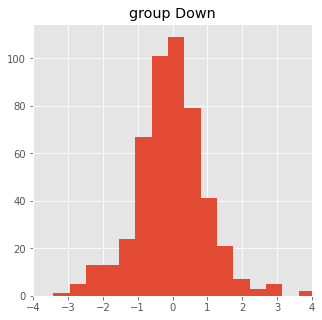

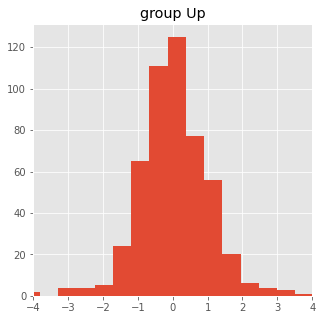

In [14]:
grouped = train.groupby('Direction')
down = grouped.get_group('Down')
up = grouped.get_group('Up')
ddown = model.transform(down[['Lag1', 'Lag2']])
dup = model.transform(up[['Lag1', 'Lag2']])

plt.figure(figsize=(5,5))
plt.hist(ddown, 16)
plt.title('group Down')
plt.xlim(-4, 4)
plt.show()

plt.figure(figsize=(5,5))
plt.hist(dup, 16)
plt.title('group Up')
plt.xlim(-4, 4)
plt.show()

In [15]:
X = smarket2005[['Lag1', 'Lag2']]
y = smarket2005['Direction']
premodel = model.predict(X)

posterior = pd.DataFrame(model.predict_proba(X), columns=model.classes_)
discriminant2005 = model.transform(X)
#no se pueden imprimir los nombres por que no estan agrupados

In [16]:
columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([model.classes_])
cm = confusion_matrix(y, premodel, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print(model.score(X, y))

     Down   Up
Down   35   76
Up     35  106
0.5595238095238095


In [17]:
print(sum(posterior['Down'] > 0.5))
print(sum(posterior['Down'] < 0.5))

70
182


In [18]:
print(posterior.iloc[:20])
print(premodel[:20])

        Down        Up
0   0.490179  0.509821
1   0.479218  0.520782
2   0.466818  0.533182
3   0.474001  0.525999
4   0.492788  0.507212
5   0.493856  0.506144
6   0.495102  0.504898
7   0.487286  0.512714
8   0.490701  0.509299
9   0.484403  0.515597
10  0.490696  0.509304
11  0.511999  0.488001
12  0.489515  0.510485
13  0.470676  0.529324
14  0.474459  0.525541
15  0.479958  0.520042
16  0.493578  0.506422
17  0.503089  0.496911
18  0.497881  0.502119
19  0.488633  0.511367
['Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Down' 'Up' 'Up']


In [19]:
print(sum(posterior['Down'] > 0.9))

0


1.4. Realice los ejercicios correspondientes al análisis discriminante cuadrático (4.6.4). Muestre imágenes de la respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio, así como de las gráficas obtenidas (colocar las imágenes en su reporte).

In [20]:
predictores = ['Lag1', 'Lag2']
respuesta = 'Direction'

X = train[predictores]
y = train[respuesta]
model = QuadraticDiscriminantAnalysis() 
model.fit(X, y)

priors = pd.DataFrame(model.priors_, index=model.classes_, columns=['']).T
print("Prior probabilities of groups:")
print(priors)
means = pd.DataFrame(model.means_, index=model.classes_, columns=predictores)
print("\nGroup means:")
print(means)
coef = pd.DataFrame(model.scalings_, columns=['QD1', 'QD2'], index=predictores)

Prior probabilities of groups:
      Down        Up
  0.491984  0.508016

Group means:
          Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325


In [21]:
X = smarket2005[predictores]
y = smarket2005[respuesta]
premodel = model.predict(X)

columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([model.classes_])
cm = confusion_matrix(y, premodel, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print(model.score(X, y))

     Down   Up
Down   30   81
Up     20  121
0.5992063492063492


1.5. Realice los ejercicios correspondientes a los K vecinos cercanos (4.6.5). Muestre imágenes de la respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio, así como de las gráficas obtenidas (colocar las imágenes en su reporte)

In [22]:
predictores = ['Lag1', 'Lag2']
respuesta = 'Direction'

In [23]:
X = train[predictores]
y = train[respuesta]
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

X = smarket2005[predictores]
y = smarket2005[respuesta]
preds = model.predict(X)

columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([ model.classes_])
cm = confusion_matrix(y, preds, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print((83+43)/252)

     Down  Up
Down   43  68
Up     58  83
0.5


In [24]:
X = train[predictores]
y = train[respuesta]
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

X = smarket2005[predictores]
y = smarket2005[respuesta]
preds = model.predict(X)

columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([model.classes_])
cm = confusion_matrix(y, preds, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print(model.score(X, y))


     Down  Up
Down   48  63
Up     55  86
0.5317460317460317


1.6. Realice los ejercicios correspondientes al conjunto de datos de seguros (Caravan) sección 4.6.6. Muestre imágenes de la respuesta en consola y redacte sus observaciones y conclusiones acerca de cada ejercicio, así como de las gráficas obtenidas (colocar las imágenes en su reporte).

In [25]:
caravan = pd.read_csv('./caravan.csv')
print(caravan.shape)
print(caravan['Purchase'].value_counts())
print(348/5822)

(5822, 86)
No     5474
Yes     348
Name: Purchase, dtype: int64
0.05977327378907592


In [26]:
predictores = caravan.columns.drop('Purchase')
respuesta = 'Purchase'
xscale = scale(caravan[predictores])
xtrain = xscale[1000:]
ytrain = caravan[respuesta][1000:]
xtest = xscale[:1000]
ytest = caravan[respuesta][:1000]
model = KNeighborsClassifier(n_neighbors=1)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)

In [27]:
columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([model.classes_])
cm = confusion_matrix(ytest, preds, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print(9/(68+9))

      No Yes
No   873  68
Yes   50   9
0.11688311688311688


In [28]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)

columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([model.classes_])
cm = confusion_matrix(ytest, preds, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print(5/26)

print()

model = KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain, ytrain)
preds = model.predict(xtest)

columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([model.classes_])
cm = confusion_matrix(ytest, preds, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print(4/15)

      No Yes
No   921  20
Yes   54   5
0.19230769230769232

      No Yes
No   930  11
Yes   55   4
0.26666666666666666


In [29]:
model = LogisticRegression(C=1e9,max_iter=1000)  
model.fit(xtrain, ytrain)
preds = model.predict(xtest)

columnas = pd.MultiIndex.from_product([model.classes_])
filas = pd.MultiIndex.from_product([model.classes_])
cm = confusion_matrix(ytest, preds, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))

print()

posterior = model.predict_proba(xtest)
Yes_idx = np.where(model.classes_ == 'Yes')[0][0]
preds = pd.Series(posterior[:, Yes_idx] > 0.25)
preds.replace([True, False], ['Yes', 'No'], inplace=True)

cm = confusion_matrix(ytest, preds, labels=model.classes_)
print(pd.DataFrame(cm, columns=columnas, index=filas))
print(11/(22+11))

      No Yes
No   934   7
Yes   59   0

      No Yes
No   919  22
Yes   48  11
0.3333333333333333
